<a href="https://colab.research.google.com/github/thesankalpagrawal/GRIP_Task3/blob/main/GRIP_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<u>Prediction using Decision Tree Algorithm</u>**

###GRIP TASK 6 - Sankalp Agrawal


Importing necessary libraries :

In [54]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

Uploading and Reading Dataset :


In [55]:
iris_dataset = pd.read_csv('Iris.csv')
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Data Analysis :

In [11]:
#Shape, Size and Dimensions of the Dataset

print('Shape of Dataset -', iris_dataset.shape)
print('Size of Dataset -', iris_dataset.size)
print('Dimensions of Dataset -', iris_dataset.ndim)

Shape of Dataset - (150, 6)
Size of Dataset - 900
Dimensions of Dataset - 2


In [12]:
#Descriptive Statistical Analysis of Dataset

iris_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
#Basic Information of Rows and Columns of the Dataset

iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Visualization:

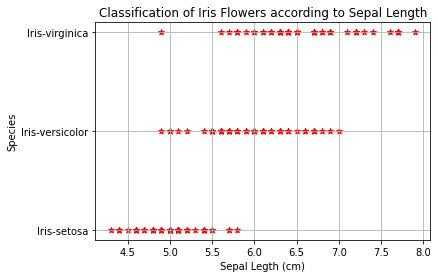

In [21]:
#Classification of Iris Flowers according to Sepal Length

plt.scatter(iris_dataset.SepalLengthCm,iris_dataset.Species,color='red',marker='*')
plt.xlabel('Sepal Legth (cm)')
plt.ylabel('Species')
plt.title('Classification of Iris Flowers according to Sepal Length')
plt.grid()
plt.show()

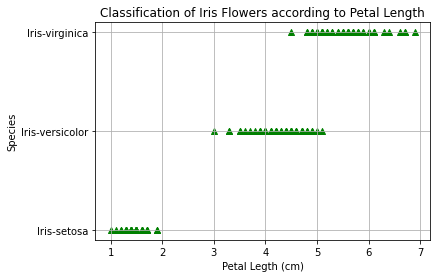

In [23]:
#Classification of Iris Flowers according to Petal Length

plt.scatter(iris_dataset.PetalLengthCm,iris_dataset.Species,color='green',marker='^')
plt.xlabel('Petal Legth (cm)')
plt.ylabel('Species')
plt.title('Classification of Iris Flowers according to Petal Length')
plt.grid()
plt.show()

Changing the data format of Species Column using Dummy Variable

In [58]:
#Creating Dummy Variables
from pandas import get_dummies
dummy = get_dummies(iris_dataset.Species)
dummy.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [25]:
#Removing Species and Adding Dummy Variable
iris_dataset = iris_dataset.drop(['Species'],axis=1)
new_iris = pd.concat([iris_dataset,dummy],axis=1)
new_iris.head

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0


Assigning Features and Labels:

In [26]:
#Assigning Features and getting information regarding it

X = new_iris.iloc[:,:5]
print('Shape of Features -', X.shape)
print('Size of Features -', X.size)
print('Dimensions of Features -', X.ndim)

Shape of Features - (150, 5)
Size of Features - 750
Dimensions of Features - 2


In [27]:
#Assigning Labels and getting information regarding it

Y = new_iris.iloc[:,5:]
print('Shape of Features -', Y.shape)
print('Size of Features -', Y.size)
print('Dimensions of Features -', Y.ndim)

Shape of Features - (150, 3)
Size of Features - 450
Dimensions of Features - 2


Splitting the Dataset:

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=1/3,random_state=1)

Creating and Feeding the Model

In [29]:
from sklearn.tree import DecisionTreeClassifier
Task3_model = DecisionTreeClassifier()
Task3_model.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Prediction using the Model

In [30]:
y_pred = Task3_model.predict(xtest)
y_pred

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [35]:
ytest = ytest.values

In [40]:
#Accuracy Score

from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest,y_pred)
print('The Accuracy Score is:',acc)

The Accuracy Score is: 0.98


In [46]:
#Visualization of the Model

# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


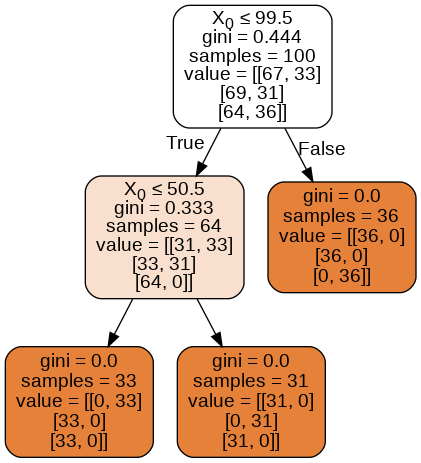

In [47]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(Task3_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())